In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final(9).csv"))

In [3]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,kitchen,ac,parking,security,furnish
0,1197368.9,17.73,1,0,0,13.074938,1,0,0,1,1
1,1197368.9,16.36,1,1,0,12.826402,0,0,0,1,0
2,1197368.9,13.64,1,1,0,12.742620,0,1,1,1,0
3,1209102.7,10.91,1,1,0,12.305825,0,1,1,0,1
4,1210424.8,13.64,1,1,0,10.919276,0,0,1,1,0


In [4]:
housing.shape

(1635, 11)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1635 non-null   float64
 1   area            1635 non-null   float64
 2   bedrooms        1635 non-null   int64  
 3   bathrooms       1635 non-null   int64  
 4   washingmachine  1635 non-null   int64  
 5   dtcenter        1635 non-null   float64
 6   kitchen         1635 non-null   int64  
 7   ac              1635 non-null   int64  
 8   parking         1635 non-null   int64  
 9   security        1635 non-null   int64  
 10  furnish         1635 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 140.6 KB


In [6]:
# outlier treatment for area
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [7]:
# outlier treatment for price
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [8]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'parking', 'security', 'furnish']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [11]:
y_train = df_train.pop('price')
X_train = df_train

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-0.1511665230817149
[ 0.56177158  0.00536587  0.19203556  0.05320522 -0.33947283  0.06737928
  0.07387732  0.18705569  0.09351343  0.04064882]


In [13]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()

print(model_2.params)

const   -5.055987e-01
x1       1.227701e+00
x2       1.971621e-01
x3       2.154761e-02
x4      -8.066544e+07
             ...     
x61     -2.117655e-02
x62      3.619797e-02
x63     -8.059873e-02
x64     -1.913594e-02
x65      7.053006e-04
Length: 66, dtype: float64


In [15]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              1697.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:18:07   Log-Likelihood:                          880.05
No. Observations:                1110   AIC:                                     -1740.
Df Residuals:                    1100   BIC:                                     -1690.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,kitchen,8.25
2,bathrooms,7.58
7,parking,7.32
6,ac,6.89
0,area,4.43
8,security,4.20
3,washingmachine,2.65
9,furnish,2.56
4,dtcenter,2.15
1,bedrooms,1.37


In [17]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     96.46
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:18:08   Log-Likelihood:                 1201.3
No. Observations:                1110   AIC:                            -2277.
Df Residuals:                    1047   BIC:                            -1961.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5056      0.099     -5.105      0.0

In [18]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'kitchen', 'ac', 'furnish', 'parking', 'security', 'furnish']

In [20]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [21]:
y_test = df_test.pop('price')
X_test = df_test

In [22]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)

In [23]:
def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 120, 'bedrooms': 3, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 2, 'dtrec': 1,
     'dthospital': 3, 'kitchen': 1, 'ac': 1, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]   

predictions = predict_prices_with_polynomial_model(model_2, polynomial_features, num_vars[1:], new_data_dict_list)
print("Predicted Prices:", predictions)


ValueError: X has 11 features, but PolynomialFeatures is expecting 10 features as input.

In [24]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [25]:
# Making predictions
y_pred = lm.predict(X_test)

In [26]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7159877203982589

In [27]:
r2_score(y_test,y_pred_2)

0.8097722444416181

Text(0, 0.5, 'y_pred')

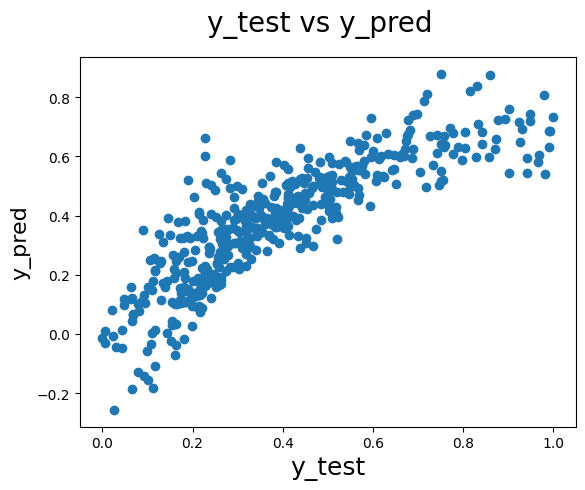

In [28]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_2')

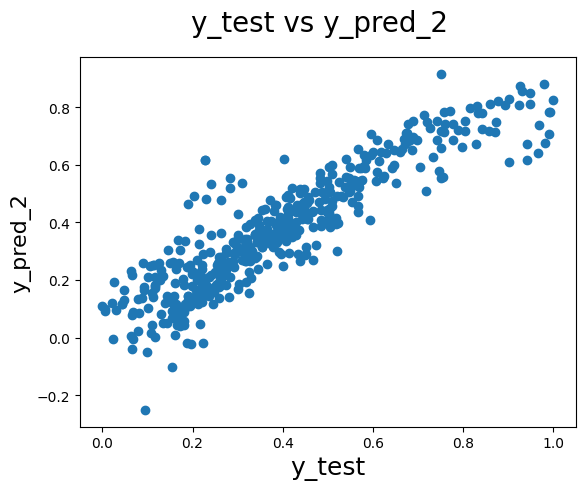

In [29]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred_2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_2', fontsize=16)                          # Y-label